In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import for train-test split
from sklearn.model_selection import train_test_split

# for features scaling
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

# for confusion matrix
from sklearn.metrics import confusion_matrix

# classification report
from sklearn.metrics import classification_report

# to calculate ROC-AUC, PR-AUC 
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

# for plots
import matplotlib.pyplot as plt

# for precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv("/kaggle/input/cleaned-credit-card-fraud-dataset-for-ml/credit_card_cleaned.csv")

As we read in Kaggke Machine Learning Course: 

**Building The Model**

We will use the scikit-learn library to create our models. When coding, this library is written as sklearn, as we will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

**The steps to building and using a model are: (DFPE)**

**Define:**  What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

**Fit:**  Capture patterns from provided data. This is the heart of modeling.

**Predict:**  Just what it sounds like

**Evaluate:**  Determine how accurate the model's predictions are.

**Step 1: - Sanity Checks**

In [19]:
# Checks rows and columns
print("how many rows and columns are there: ")
print(df.shape)
print("\n")

# Check which columns and their datatyoes are there
print("Columns and their datatypes: ")
df.info()
print("\n")

# check nulls and their counts. we can display only first 5 record
print("Null counts: ")
df.isnull().sum().head()

#top 5 rows of dataset
df.head

how many rows and columns are there: 
(283726, 31)


Columns and their datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
283721  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
283722  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
283723  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
283724  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
283725  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

**Dataset Readines:**

The dataset contains approximately 284,000 rows with a binary target column fraud.
There are no missing values, and all features are numeric, making the dataset suitable for machine learning.
The extreme imbalance in the target variable confirms that fraud detection is the core challenge of this problem.


**Step 2: - Verify Class Imbalance** (Crucial)

In [20]:
# this is core of the problem. count target values
df['fraud'].value_counts()

# and normalize. Its the rate of occurrences of each value instead of the number of occurrences. 
#It returns the relative frequency by dividing all values by the sum of values. 
# rescaling real-valued numeric attributes into a 0 to 1 range

df['fraud'].value_counts(normalize= True)

fraud
0    0.998333
1    0.001667
Name: proportion, dtype: float64

The dataset is extremely imbalanced, with fraud transactions accounting for approximately 0.17% of all transacytions. This makes accuracy an unreliable evaluation metric and motivates the use of Precision-Recall curves and PR-AUC.

**Step 3: - Separate Features & Target**

In [21]:
# in general ML practice, 'capital x' is used for features and 'small y' for target variable
X = df.drop(columns = ['fraud'])  
y = df['fraud']

#print(X)
#print(y)

**Step 4: - Stratified Train/Test Split** (Very Important Step)

In [22]:
# remember: stratify = y for imbalanced data where some classes are underrepresented. This parameter 
# ensures that the training and testing have the same proportion of classes (or labels) as the original dataset

# test_size=0.2: 20% data is for testing and 80% data for training

# random_state = 42: Number 42 is just a "seed" number which used to set the seed for the random number generator. 
# Both random_state and seed are used to ensure that the same random numbers are generated every time the 
# code is run, which makes the results reproducible. It is not mandatory to use 42 only.

# X_train, y_train are input and out for training data, X_test, y_test are input and output of test data 

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

# normalize target values for test & train

print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

fraud
0    0.998335
1    0.001665
Name: proportion, dtype: float64
fraud
0    0.998326
1    0.001674
Name: proportion, dtype: float64


**Step 5: - Baseline Model (Logistic Regression)** 

In [23]:
# We scale data with StandardScaler to transform features to have a mean of 0 and a standard deviation of 1,
# preventing features with larger scales from overpowering features with smaller scales in distance-based 
# models, ensuring all features contribute equally for better model accuracy and convergence

scaler = StandardScaler()

# scaling is crucial to prevent bias, ensures equal contribution, improves algorithm performance & aids gradient descent

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()    # // for getting value errors

cols_to_scale = ['Time','Amount']

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale].values)

# fit(): The scaler calculates the necessary parameters (like the mean and standard deviation for each 
# column in the case of StandardScaler) from the training data only. transform(): It then applies these learned parameters to scale the training data. 

#Why use fit_transform() only on the training data?
#The crucial point is that the scaling parameters must be learned only from the training data. 
# This prevents data leakage, where information about the test set's distribution might unintentionally 
# influence the model's training process. 

X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale].values)

# For the test data, you would use scaler.transform(X_test[cols_to_scale]) with the same scaler object ## 
# (which already "learned" the parameters from the training set). You do not call fit() again on the test data. 

**Step 6: - Train Baseline Logistic Regression**

In [24]:
lr = LogisticRegression(
    max_iter = 1000,
    random_state = 42
)

lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**Step 7: - Baseline Evaluation**

**Accuracy, Precision and Recall **
These three are used to evaluate the quality of classification model. 

**Accuracy** is how much classification model is correct overall. However if dataset is higly imbalance (as in credit card fraud detection case), then accuracy is not helpful metric. In this case we usr recall and precision. 

**Recall** shows if the ML model can find all he object of target class of all the positive samples in the dataset. In credit card fraud detection case recall should be higher, as we want to get maximum fraud detection. 

**Precision** shows how often the ML model ois correct when predicting the target class. it works well with imbalance data. it does not work well when the cost of false negative is high. so in case of credit card fraud detection precison should be lower and recall should be higher.  



In [26]:
# predictions & probabilities
y_pred = lr.predict(X_test_scaled)

y_prob = lr.predict_proba(X_test_scaled)[:, 1]
# The predict_proba method returns an array with columns representing the predicted probabilities for each class
# Each row corresponds to an instance in the test set, and the probabilities offer insights into the model's 
# confidence regarding the likelihood of each class.

# cofusion matrix

confusion_matrix(y_test, y_pred)

#A confusion matrix is a table that visualizes a classification model's performance by comparing 
#actual vs. predicted labels, showing correct (True Positives/Negatives) and incorrect (False Positives/Negatives) 
#predictions

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



**Baseline Model Evaluation:**

The confusion matrix shows that the baseline logistic regression model identifies 56 fraudulent transactions (True Positives) while missing 39 fraudulent transactions (False Negatives) out of 95 total fraud cases.

This results in a fraud recall of approximately 59%, meaning that 41% of fraudulent transactions are missed, which is unacceptable in a real-world fraud detection system. 

Although the model reports near-perfect accuracy, this metric is misleading due to severe class imbalance.

Since over 99.8% of transactions are non-fraudulent, a model can achieve very high accuracy while still failing to detect a significant proportion of fraud cases.

Normal (0): 56,651  Fraud (1): 95  It means Extremely imbalanced (fraud is tiny).

Precision = 0.85
When the model says “fraud”, it’s correct 85% of the time.

Recall = 0.59
It catches 59% of real fraud cases.
That means it misses 41% of fraud.

**Quick implication:**
Missed frauds ≈ 95×(1−0.59)
Missed frauds = 38.95 ≈ 39 fraud cases missed.

**Confusion Matrix + exact TP/FP/FN/TN**

We use a confusion matrix in machine learning because it gives a detailed breakdown of classification model performance, showing correct (True Positives/Negatives) and incorrect (False Positives/Negatives) predictions, which is much more insightful than just accuracy, especially with imbalanced datasets, allowing us to identify specific errors (like missed detections or false alarms) and calculate metrics like Precision, Recall, and F1-score to improve the model for different business needs. 

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56641,    10],
       [   39,    56]])

This matrix shows :
True Positive (TP) : 56
False Positive (FP) : 10
False Negative (FN) : 39
True Negative (TN) : 56641

Caught Fraud: (Recall or True Positove Rate) = 56
Missed fraud: False Negative (FN)  =  39
Total actual frauds = FN + TP = 39 + 56 = 95

**Interpretation:**

Fraud recall = 0.86 approximately

Fraud precision = 0.046 approximately

The baseline logistic regression is conservative: when it flags fraud, it is usually correct (high precision), but it still misses a significant portion of fraudulent transactions (39 out of 95).
At default threshold of 0.5, the baseline logistic regression model detects 56 out of 95 fraud transactions while missing 39 fraud cases. Precision is high (approximately 85%), the recall is insufficient for a fraud detection system where missing frauds is costly.


**Precision and recall** are key metrics in machine learning classification, especially with imbalanced data, helping evaluate how well a model identifies relevant items versus avoiding false alarms. 

**Precision answers:** "Of all items predicted positive, how many were actually positive?" (minimizing false positives).

**Recall answers:** "Of all actual positive items, how many did the model find?" (minimizing false negatives). They often involve a trade-off, with high recall potentially lowering precision, depending on the use case.





**When to Use Which?**

**High Precision Needed:** When the cost of a false positive is high (e.g., marking an important email as spam). 

**High Recall Needed:** When the cost of a false negative is high (e.g., missing a cancerous tumor or a weapon). 

**F1-Score:** A combined metric (harmonic mean of precision and recall) used for a balanced view, especially in imbalanced datasets.

**Step 8: Threshold Tuning**

It is used for decision making. We will see at what threshold we can catch more fraud while keeping false alarm reasonable.


**For fraud detection we need to increase recall**

**Acceptable tradeoff would be: lower precision is ok**

we will try multiple threshold now.


In [32]:
#import numpy as np
thresholds = np.arange(0.05, 1.00, 0.05)

rows = []
for thr in thresholds:
    y_thr = (y_prob >= thr).astype(int)
    prec = precision_score(y_test, y_thr, zero_division=0)
    rec  = recall_score(y_test, y_thr)
    f1   = f1_score(y_test, y_thr)
    tn, fp, fn, tp = confusion_matrix(y_test, y_thr).ravel()
    rows.append([thr, prec, rec, f1, fp, fn, tp])

df_thr = pd.DataFrame(rows, columns=["Threshold","Precision","Recall","F1","FP","FN","TP"])
df_thr.sort_values(["Recall","Precision"], ascending=[False, False]).head(15)

,Threshold,Precision,Recall,F1,FP,FN,TP
0,0.05,0.804348,0.778947,0.791444,18,21,74
1,0.10,0.843373,0.736842,0.786517,13,25,70
2,0.15,0.839506,0.715789,0.772727,13,27,68
3,0.20,0.835443,0.694737,0.758621,13,29,66
4,0.25,0.824324,0.642105,0.721893,13,34,61
5,0.30,0.845070,0.631579,0.722892,11,35,60
6,0.35,0.845070,0.631579,0.722892,11,35,60
7,0.40,0.852941,0.610526,0.711656,10,37,58
8,0.45,0.850746,0.600000,0.703704,10,38,57
9,0.50,0.848485,0.589474,0.695652,10,39,56


**Table Results Interpretation:**

Its clear from the table that as threshold decreases recall increases and precision decreases. It means fewer missed frauds and more false alarms. 

In credit card fraud detection case, we cannot affoard missed fraud detection, the price of missed fraud detection is higher(lower recall) but we can accept increased false alarms(decreased precision).

We can see that at 0.05 threshold our recall is 0.78 and precision is 0.80 and F1(which is balance of recall and precision) is 0.79. It shows it can catch 78% of fraud detection. False positive and false negatives are 18 & 21 respectively.

Its much better than threshold 0.5, where system could miss 59% frauds. Still its not desireable to accept this percentage of missing fraud detection. 

To improve the model we will choose the threshold lower than 0.05 and will try to improve the performance.

To push recall higher we will test a finer grid like 0.001-0.05.

In [33]:
thresholds = np.arange(0.001, 0.051, 0.001)

rows = []
for thr in thresholds:
    y_thr = (y_prob >= thr).astype(int)
    prec = precision_score(y_test, y_thr, zero_division=0)
    rec  = recall_score(y_test, y_thr)
    f1   = f1_score(y_test, y_thr)
    tn, fp, fn, tp = confusion_matrix(y_test, y_thr).ravel()
    rows.append([thr, prec, rec, f1, fp, fn, tp])

df_thr = pd.DataFrame(rows, columns=["Threshold","Precision","Recall","F1","FP","FN","TP"])
df_thr.sort_values(["Recall","Precision"], ascending=[False, False]).head(15)

,Threshold,Precision,Recall,F1,FP,FN,TP
1,0.002,0.045964,0.863158,0.087280,1702,13,82
0,0.001,0.017730,0.863158,0.034746,4543,13,82
2,0.003,0.078295,0.831579,0.143116,930,16,79
6,0.007,0.313008,0.810526,0.451613,169,18,77
5,0.006,0.229851,0.810526,0.358140,258,18,77
4,0.005,0.164882,0.810526,0.274021,390,18,77
3,0.004,0.120690,0.810526,0.210095,561,18,77
7,0.008,0.372549,0.800000,0.508361,128,19,76
30,0.031,0.735294,0.789474,0.761421,27,20,75
29,0.030,0.728155,0.789474,0.757576,28,20,75


**Threshold Tuning Explanation:**

Threshold tuning was performed to explore the trade-off between fraud detection recall and false positives. As the classification threshold decreases, recall improves, reducing the number of missed frauds, but this comes at the cost of increased false alarms.

At very low thresholds (e.g., 0.001–0.002), recall reaches approximately 86%, but precision deteriorates sharply and the number of false positives becomes operationally prohibitive.

A more balanced operating point is observed around thresholds 0.006–0.007, where recall remains above 80% while false positives are reduced by an order of magnitude compared to the lowest thresholds.

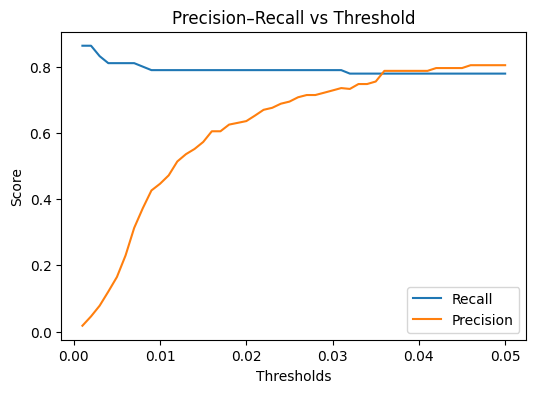

In [37]:
plt.figure(figsize=(6,4))

plt.plot(df_thr["Threshold"], df_thr["Recall"], label="Recall")
plt.plot(df_thr["Threshold"], df_thr["Precision"], label="Precision")

#plt.plot(df_thr["thresholds"], df_thr["recall"], label="Recall")
#plt.plot(df_thr["thresholds"], df_thr["precision"], label="Precision")
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.legend()
plt.title("Precision–Recall vs Threshold")
plt.show()


Precision–Recall trade-off across low decision thresholds highlighting the operational region for improved fraud recall.

**Final Decision Statement:**

Based on business considerations where missed fraud is significantly more costly than manual review of false positives, a decision threshold of 0.007 was selected.
This threshold provides a practical balance between fraud detection effectiveness and operational feasibility.